In [1]:
# Importing required libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import warnings

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Printing Plots in Notebook
%matplotlib inline

# Ignoring warnings
warnings.filterwarnings('ignore')

In [2]:
# Datapath
DATA_SET_PATH = '/home/ashay/ASHAYKING/dataset/credit-card'

In [3]:
data_raw = pd.read_csv( DATA_SET_PATH + '/creditcard.csv')
data = data_raw.copy(deep = True)

In [4]:
print('Train columns with null values:\n', data.isnull().sum())
print("-"*10)

Train columns with null values:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
----------


In [5]:
# Loading Data
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


* V1-V28 -> PCAed feature set
* Time represent time of transaction
* Amount represent how much amount transacted
* Class -> Acts as representar for Fraud or not

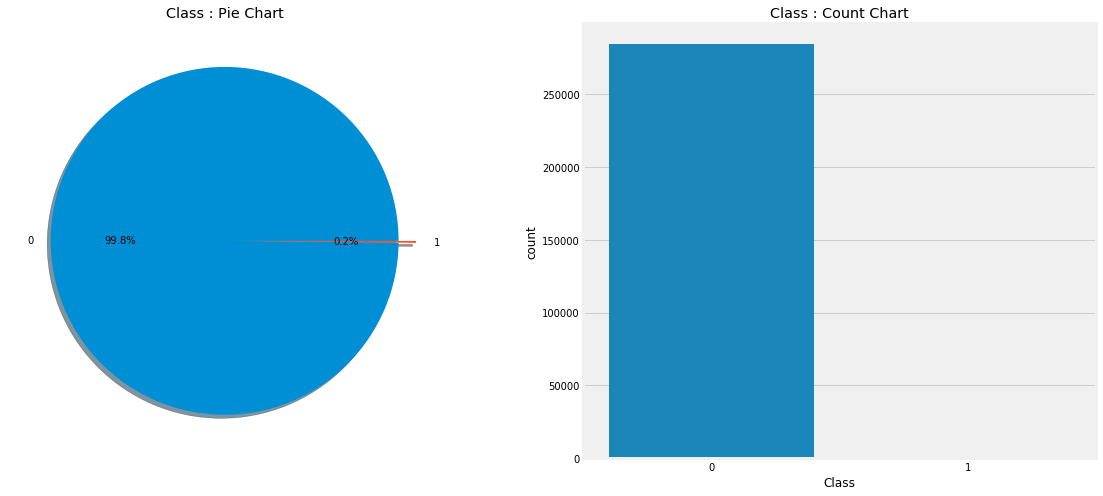

In [6]:
# We want to plot two chart. hence create f object with 2 sections
f, ax = plt.subplots(1,2,figsize=(18,8))

survived_ratio = data['Class'].value_counts()
survived_ratio.plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Class : Pie Chart')
ax[0].set_ylabel('')

sns.countplot('Class',data=data,ax=ax[1])
ax[1].set_title('Class : Count Chart')

plt.show()

* We only have 0.2% of data as fraud which we want to predict accurate

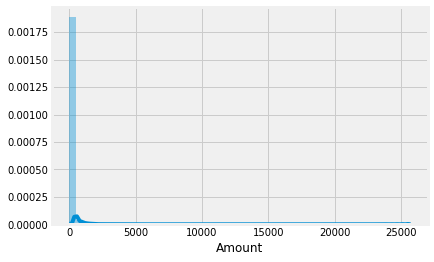

In [7]:
sns.distplot(data[data.Class==0]['Amount'])

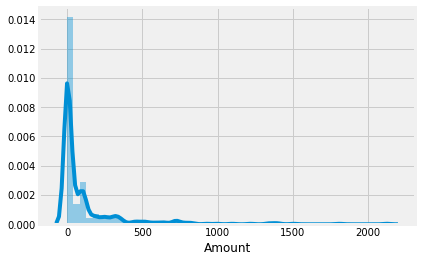

In [8]:
sns.distplot(data[data.Class==1]['Amount'])

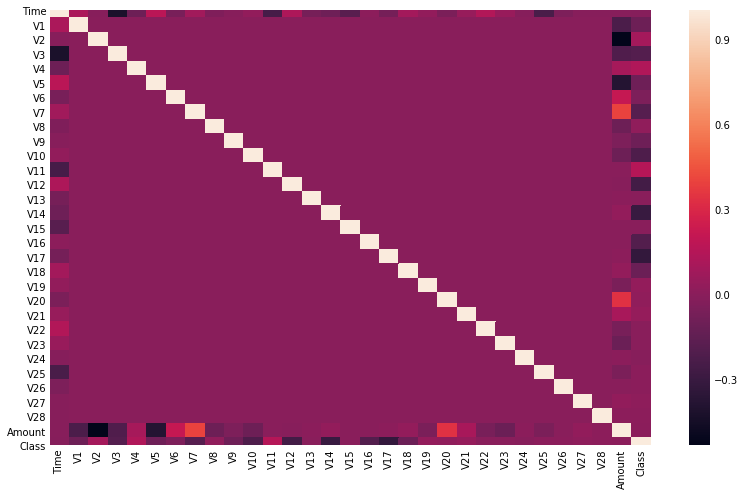

In [15]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr())
plt.show()

In [9]:
fraud = data[data['Class']==1]
valid = data[data['Class']==0]
outlier_fraction = len(fraud)/float(len(valid))

In [10]:
print(outlier_fraction)
print("Fraud Cases : {}".format(len(fraud)))
print("Valid Cases : {}".format(len(valid)))

0.0017304750013189597
Fraud Cases : 492
Valid Cases : 284315


### Applying ML

In [16]:
X = data.drop(['Class'],axis=1)
y = data['Class']

X.shape, y.shape

((284807, 30), (284807,))

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0,stratify=y)

In [19]:
X_train.shape, X_test.shape

((199364, 30), (85443, 30))

In [20]:
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.covariance import EllipticEnvelope

from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

In [29]:
def get_results_from_prediction(outlier_alg_pred,actual_y):
    # Applying valid labels
    outlier_alg_pred_class=outlier_alg_pred.copy()
    outlier_alg_pred_class[outlier_alg_pred==-1] = 1
    outlier_alg_pred_class[outlier_alg_pred==1] = 0

    # Compute total number of errors 
    errors_lof = (outlier_alg_pred_class != actual_y).sum() 
    print("\nNumber of Errors: ", errors_lof)
    print("Accuracy Score: ", accuracy_score(outlier_alg_pred_class, actual_y))
    print('Classification Matric')
    print(confusion_matrix(actual_y, outlier_alg_pred_class))
    print('Classification Report')
    print(classification_report(actual_y, outlier_alg_pred_class))

### Applying LocalOutlierFactor

In [32]:
clfLOF=LocalOutlierFactor(
    n_neighbors=2, 
    algorithm='auto', 
    leaf_size=20, 
    metric='minkowski', 
    p=2, 
    metric_params=None, 
    contamination=0.1, 
    n_jobs=-1
)

ytrain_pred = clfLOF.fit_predict(X_train)
get_results_from_prediction(ytrain_pred,y_train)


Number of Errors:  19902
Accuracy Score:  0.9001725487048815
Classification Matric
[[179273  19747]
 [   155    189]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.90      0.95    199020
           1       0.01      0.55      0.02       344

    accuracy                           0.90    199364
   macro avg       0.50      0.73      0.48    199364
weighted avg       1.00      0.90      0.95    199364



### Applying IsolationForest

In [33]:
clfISOForest = IsolationForest(
    n_estimators=100, 
    max_samples='auto', 
    contamination=0.1,
    max_features=1.0, 
    bootstrap=False,
    verbose=1, 
    n_jobs=-1, 
    random_state=42, 
    behaviour="new"
)

clfISOForest.fit(X_train)

ytest_pred = clfISOForest.predict(X_test)
get_results_from_prediction(ytest_pred,y_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    2.0s remaining:    6.1s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    2.2s finished



Number of Errors:  8546
Accuracy Score:  0.8999801036948609
Classification Matric
[[76768  8527]
 [   19   129]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.90      0.95     85295
           1       0.01      0.87      0.03       148

    accuracy                           0.90     85443
   macro avg       0.51      0.89      0.49     85443
weighted avg       1.00      0.90      0.95     85443



### Applying EllipticEnvelope

In [34]:
clfEE = EllipticEnvelope(contamination=0.1,random_state=0, support_fraction=0.1)
clfEE.fit(X_train)

ytest_pred = clfEE.predict(X_test)
get_results_from_prediction(ytest_pred,y_test)


Number of Errors:  8552
Accuracy Score:  0.8999098814414288
Classification Matric
[[76765  8530]
 [   22   126]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.90      0.95     85295
           1       0.01      0.85      0.03       148

    accuracy                           0.90     85443
   macro avg       0.51      0.88      0.49     85443
weighted avg       1.00      0.90      0.95     85443



## Thanks....Happy Learning!!